###Factor Analysis using Wine dataset

#Description
 It consists of the chemical analysis of wines grown in the same region in Italy but derived from three different cultivars (varieties of grape).

The Wine dataset consists of 13 features that describe the chemical property of wines.

Alcohol: Alcohol content in wine.

Malic acid: Amount of malic acid.

Ash: Ash content in wine.

Alcalinity of ash: Alkalinity of the ash.

Magnesium: Magnesium content in wine.

Total phenols: Total phenolic content.

Flavanoids: Flavonoid content.

Nonflavanoid phenols: Nonflavonoid phenolic content.

Proanthocyanins: Proanthocyanin content.

Color intensity: Intensity of the color.

Hue: Hue of the wine.

OD280/OD315 of diluted wines: Optical density ratio.

Proline: Proline content.

##Target Variable:

Cultivar:

 The dataset includes a target variable that classifies the wine into one of three cultivars (classes). These are typically labeled as 0, 1, and 2, representing the three different wine types.


##Dataset Size:

Samples: 178  Features: 13  Target Classes: 3

##Objective of the Data Analysis

The primary objective of this data analysis is to explore the underlying structure of the Wine dataset by performing Factor Analysis.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.decomposition import FactorAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names) # Create a DataFrame using the data and feature names from wine

wine_df['target'] = wine.target # Add the target variable to the DataFrame

print(wine_df.head()) # View the first few rows of the DataFrame

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

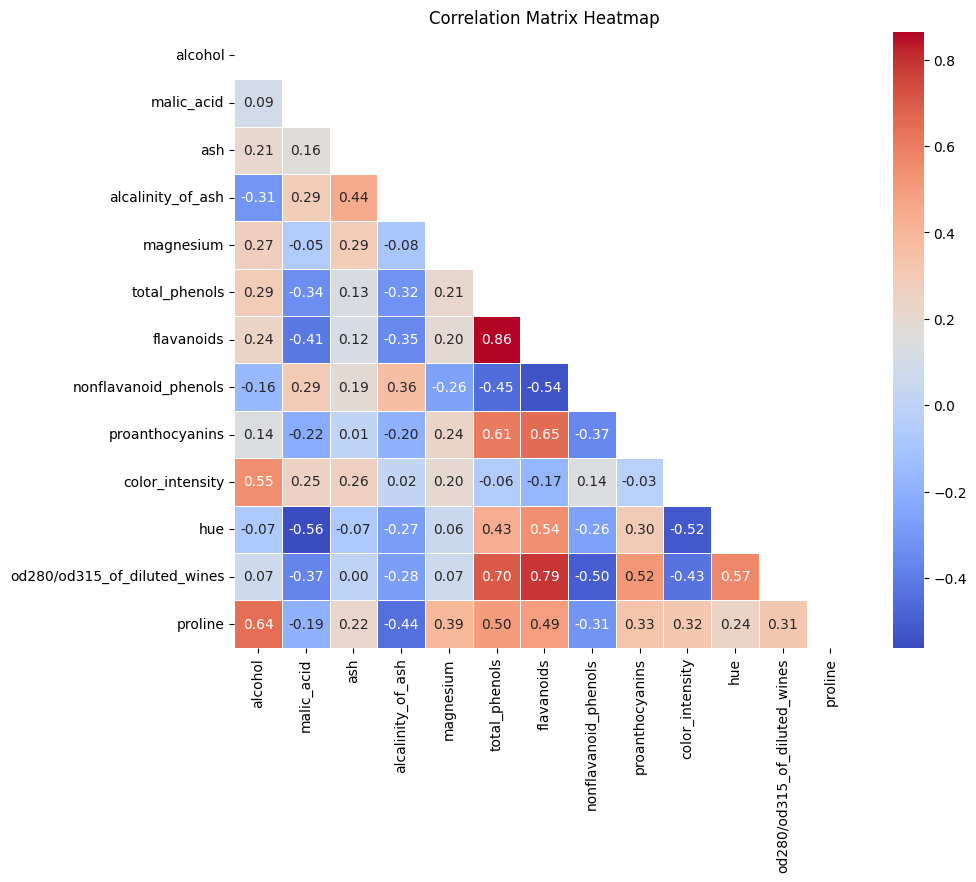

In [ ]:
#Heatmap

# Convert the feature data to a DataFrame for easier analysis
df_original = pd.DataFrame(X, columns=wine.feature_names)

# Calculate the correlation matrix
correlation_matrix = df_original.corr()

# Display the correlation matrix
#print("Correlation Matrix of the Original Features:")
#print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,mask=mask)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X = wine.data  # Features (chemical composition)
y = wine.target  # Target variable (cultivar)

In [ ]:
# Perform factor analysis
n_factors = 3  # Specify the number of factors you want to extract
fa = FactorAnalysis(n_components=n_factors)
X_transformed = fa.fit_transform(X)

In [ ]:
# Create a DataFrame for easier analysis and visualization
df = pd.DataFrame(X_transformed, columns=[f'Factor {i+1}' for i in range(n_factors)])
df['Cultivar'] = y

In [ ]:
# Display the transformed data
#After applying Factor Analysis, the original 13 features are transformed into 3 factors.
print(df)

     Factor 1  Factor 2  Factor 3  Cultivar
0    1.014301  1.640464  0.775928         0
1    0.964972 -0.397512  0.380925         0
2    1.394808 -0.496930  0.532487         0
3    2.334626  0.013565  0.497319         0
4   -0.036760  1.408019  0.708122         0
..        ...       ...       ...       ...
173 -0.022339 -0.350430 -1.677925         2
174  0.009901  0.170775 -1.468592         2
175  0.281491  1.423338 -1.792123         2
176  0.297409  1.415649 -1.724757         2
177 -0.595244 -0.025533 -1.207518         2

[178 rows x 4 columns]


The factor loadings indicate how much each original feature contributes to each factor.

In [ ]:
# Display the factor loadings
print("\nFactor Loadings:")
print(fa.components_)


Factor Loadings:
[[ 5.21127471e-01 -2.13914148e-01  6.12208833e-02 -1.46707008e+00
   5.61190867e+00  3.10916211e-01  4.92308897e-01 -3.86619976e-02
   1.88661133e-01  7.30823690e-01  5.38348204e-02  2.21443396e-01
   3.14019977e+02]
 [ 1.54928035e-02  2.63837970e-02  5.92891625e-02  3.30257125e-01
   1.30515547e+01  1.24334616e-02  1.22254945e-03 -1.80035431e-02
   6.61699436e-02  1.92250123e-01 -9.56813831e-03 -4.43720044e-02
  -2.32297608e-01]
 [-1.06840112e-01 -4.53509707e-01 -1.57619146e-02 -6.04323750e-01
   1.31882652e-03  4.50608220e-01  8.15432163e-01 -5.82223450e-02
   3.26825853e-01 -1.05754850e+00  1.24990407e-01  5.55892014e-01
  -2.46273789e-02]]


##Factor 1:
Captures the "richness" or "strength" of the wine, influenced by proline and alcohol.

##Factor 2:
Reflects the "acidity" of the wine, influenced by features like malic_acid.

##Factor 3:
Represents the "color intensity and phenolic richness," influenced by hue, color_intensity, and flavanoids.

This interpretation allows you to understand how the different chemical properties of the wine are captured by the factors, which gives insights into the characteristics that define each wine sample.

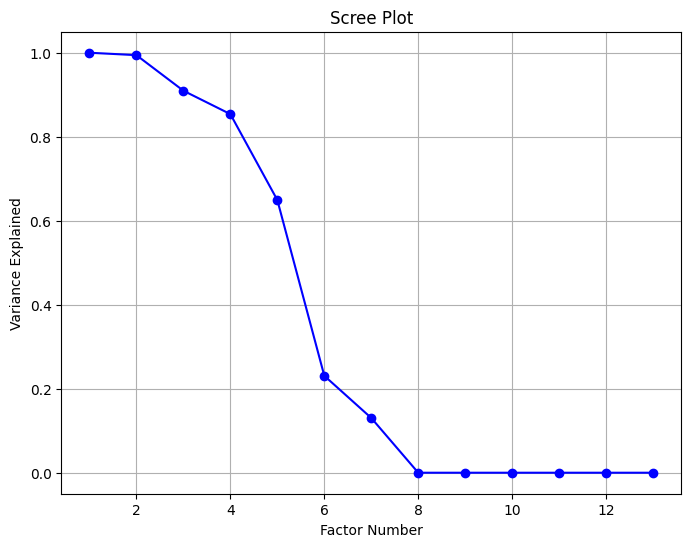

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features

# Perform Factor Analysis with the number of components equal to the number of features
fa = FactorAnalysis(n_components=X.shape[1])
fa.fit(X)

# Calculate the variance explained by each factor (eigenvalues of the covariance matrix of the factors)
explained_variance = np.var(fa.transform(X), axis=0)

# Sort explained variance in descending order
explained_variance_sorted = np.sort(explained_variance)[::-1]

# Plot the Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_sorted) + 1), explained_variance_sorted, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


##Final Results
1.The original dataset with 13 chemical features is reduced to a smaller number of factors

2.Each wine sample is now represented in terms of these few factors rather than the original 13 features.ie..each wine is described by its values on these 3 factors.

3.Use the factors as input for classification models to predict wine cultivar.

